This Notebook compares the performance and accuracy of the top 10 differrent types of machine learning algorithms for Classification on the same Dataset without any EDA done. The goal is to present to you the 10 most popular Classification Algorithms. In this notebook we will have the algorithmes below:

* Logistique Regression
* Random Forest 
* Support Vector Machines (SVM)
* Gradient Boosting
* Decision Tree 
* Neural Network Regression
* KNN Model
* Naive Bayes
* Voting Classification
* Boosting Decision Tree
* XGBRegressor 

**We will use the method based on cross validation because this allows us to have a real overview of the score of our models**

## **Loading all packages to use in this tutorial**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from xgboost import XGBRegressor
from sklearn.svm import LinearSVC

## **Loading of database training and validate**

In [2]:
data = pd.read_csv("../input/titanic/train.csv", index_col = 'PassengerId')

### **Shape analysis of our database**

In [3]:
print(data.shape)
print('-'*40)
print(data.info())
print('-'*50)
print(data.describe())
print('-'*50)
print(data.describe(include=['O']))
print('-'*50)
print(data.head(5))

(891, 11)
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB
None
--------------------------------------------------
         Survived      Pclass         Age       SibSp       Parch        Fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381

In [4]:
(data.isnull().sum().sort_values(ascending=True)*100)/data.shape[0]

Survived     0.000000
Pclass       0.000000
Name         0.000000
Sex          0.000000
SibSp        0.000000
Parch        0.000000
Ticket       0.000000
Fare         0.000000
Embarked     0.224467
Age         19.865320
Cabin       77.104377
dtype: float64

* _Cabin_ variable contains **77.10%** of missing values so its can be said to be useless for us, so it will droped.
* _Age_ variable contains **19.87%** of missing values and so can be imputed using a chosen method
* Lastly the _Embarked_ variable contain less than **1%** of missing values so can easily be imputed using a choosen methode.

## **Feature selection**

In [5]:
features = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare"]
X = data [features]
y = data ["Survived"]

## **Cleaning data with Pipeline**

In [6]:
cat = [col for col in X.select_dtypes(include = "object")]
num = [col for col in X.select_dtypes(exclude = "object")]
cat_pipeline = Pipeline(steps = [
                            ("encode", OrdinalEncoder())
])
num_pipline = Pipeline(steps = [
                            ("impute", KNNImputer(n_neighbors = 5)),
                            ("standard", StandardScaler())
])

In [7]:
transform = ColumnTransformer(transformers = [
                    ("cat", cat_pipeline, cat),
                    ("num", num_pipline, num)
])

## **Time to train and compare our models**

### 1 . Logistique Regression

Logistic Regression is one of the oldest and most basic algorithms to solve a classification problem:

In [8]:
lr = LogisticRegression(max_iter=500)
pipeline = Pipeline(steps = [
                    ("transformer", transform),
                    ("model", lr)
])
scores_lr = cross_val_score(pipeline, X, y, cv = 8)
print(scores_lr.mean(), scores_lr.std())

0.792350386100386 0.026519008904844765


### **2 . Naive Bayes**

The Naive Bayes method is a supervised learning algorithm based on applying Bayes’ theorem with the “naive” assumption of conditional independence between every pair of features given the value of the class variable.

In [9]:
nb = GaussianNB()
pipeline = Pipeline(steps = [
                    ("transformer", transform),
                    ("model", nb)
])
scores_nb = cross_val_score(pipeline, X, y, cv = 8)
print(scores_nb.mean(), scores_nb.std())

0.7834117599742599 0.021913924410353145


### 3 .**KNN**

The k-nearest neighbors (KNN) algorithm is a supervised machine learning algorithm that can be used to solve both classification and regression problems. For KNN, it is known that it does not work so well with large datasets (high sample size) and in with many features (high dimensions) in particular.

In [10]:
knn = KNeighborsClassifier()
pipeline = Pipeline(steps = [
                    ("transformer", transform),
                    ("model", knn)
])
scores_knn = cross_val_score(pipeline, X, y, cv = 8)
print(scores_knn.mean(), scores_knn.std())

0.7980715090090089 0.03587288243314131


### 4 . **Random Forest**

The Random Forest Algorithm is another frequently used ensemble learning classifier which uses multiple decision trees. The Random Forest classifier is basically a modified bagging algorithm of a Decision Tree that selects the subsets differently. I found out that max_depth=10 is a good value for this feature-rich dataset.

In [11]:
rand = RandomForestClassifier(n_estimators=300, max_depth=10)
pipeline = Pipeline(steps = [
                    ("transformer", transform),
                    ("model", rand)
])
scores_rand = cross_val_score(pipeline, X, y, cv = 6)
print(scores_rand.mean(), scores_rand.std())

0.8282922183928895 0.037880790101198346


### 5 . **Decision Tree**

A Decision Tree is a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules (if-else) inferred from the data features.

In [12]:
tr = DecisionTreeClassifier()
pipeline = Pipeline(steps = [
                    ("transformer", transform),
                    ("model", tr)
])
scores_tr = cross_val_score(pipeline, X, y, cv = 6)
print(scores_tr.mean(), scores_tr.std())

0.7789467319668661 0.0290662276117828


### 6 . **Gradient Boosting**

The idea behind boosting comes from the intuition that weak learners could be modified in order to become better. Gradient Boosting is an iterative functional gradient algorithm, i.e an algorithm which minimizes a loss function by iteratively choosing a function that points towards the negative gradient; a weak hypothesis.

In [13]:
grd = GradientBoostingClassifier(n_estimators=300)
pipeline = Pipeline(steps = [
                    ("transformer", transform),
                    ("model", grd)
])
scores_grd = cross_val_score(pipeline, X, y, cv = 8)
print(scores_grd.mean(), scores_grd.std())

0.8316743082368082 0.017613761091088555


### 7 . **Support Vector Machine - SVM**

The Support Vector Machine is a simple algorithm for classification and regression tasks. It can provide high accuracy with less computation power very fast. Due to the large number of features, we are using the LinearSVC. It turned out that setting the regularisation parameter C=0.0001 improves the quality of the prediction and reduces overfitting.

In [14]:
sv = LinearSVC(C=0.0001)
pipeline = Pipeline(steps = [
                    ("transformer", transform),
                    ("model", sv)
])
scores_sv = cross_val_score(pipeline, X, y, cv = 8)
print(scores_sv.mean(), scores_sv.std())

0.7228422619047619 0.034003124492333316


### 8 . **Neural Network**

Deep learning uses an artificial neural network that uses multiple layers to progressively extract higher level features from the training data. We are using a simple three-layer network without any optimisation, except the usage of a small validation dataset. Here we are using Keras instead of Sklearn.

In [15]:
mlp = MLPClassifier(max_iter=300)
pipeline = Pipeline(steps = [
                    ("transformer", transform),
                    ("model", mlp)
])
scores_mlp = cross_val_score(pipeline, X, y, cv = 8)
print(scores_mlp.mean(), scores_mlp.std())

/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multi

0.8182412323037324 0.03325395854468399


/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


### 9 . **Voting**

This classifier from the ensemble learning toolbox evaluates different classifiers and selects the best out of it.

The idea behind the VotingClassifier is to combine conceptually different machine learning classifiers and use a majority vote or the average predicted probabilities to predict the class labels. Such a classifier can be useful for a set of equally well performing models in order to balance out their individual weaknesses.

So let’s use this classifier to combine some of the models we had so far and apply the Voting Classifier on:

* Gradient Boossting
* Random forest
* Logistique Regression
* Decision Tree

In [16]:
evc=VotingClassifier(estimators=[('nb',nb),('lr',lr),('rf',rand),('grd',grd)],voting='hard')
pipeline = Pipeline(steps = [
                    ("transformer", transform),
                    ("model", evc)
])
scores_evc = cross_val_score(pipeline, X, y, cv = 8)
print(scores_evc.mean(), scores_evc.std())

0.8159387065637065 0.028756934221351026


### 10 . **Boosting Decision Tree**

In general, we can’t use Boosting to improve a completely overfitted model with score = 1. To apply Boosting, we first have to tweak the decision tree classifier a bit. It took me some trial and error until I got the best parameters for the Decision Tree and the AdaBoost Classifier. I am sure you can further improve by playing around a bit more.

In [17]:
adb = AdaBoostClassifier(DecisionTreeClassifier(min_samples_split=10,max_depth=4),n_estimators=10,learning_rate=0.6)
pipeline = Pipeline(steps = [
                    ("transformer", transform),
                    ("model", adb)
])
scores_adb = cross_val_score(pipeline, X, y, cv = 8)
print(scores_adb.mean(), scores_adb.std())

0.8047779922779923 0.02123441671350452


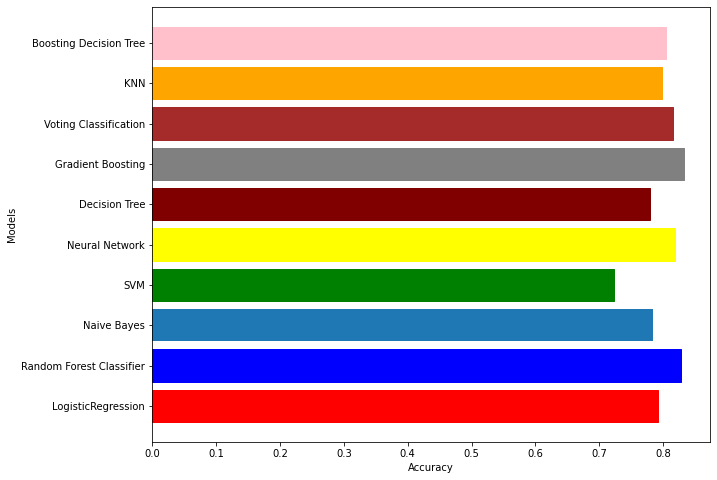

In [18]:
names = ['LogisticRegression' , 'Random Forest Classifier','Naive Bayes', 'SVM', 'Neural Network', 
         'Decision Tree', 'Gradient Boosting', 'Voting Classification', 'KNN', 'Boosting Decision Tree']
acc = [scores_lr.mean(),scores_rand.mean(),scores_nb.mean(),scores_sv.mean(),scores_mlp.mean(),
      scores_tr.mean(), scores_grd.mean(), scores_evc.mean(), scores_knn.mean(), scores_adb.mean()]

plt.figure(figsize=(10,8))
graph = plt.barh(names,acc)
plt.xlabel('Accuracy')
plt.ylabel('Models')    
graph[0].set_color('red')
graph[1].set_color('blue')
graph[3].set_color('green')
graph[4].set_color('yellow')
graph[5].set_color('maroon')
graph[6].set_color('grey')
graph[7].set_color('brown')
graph[8].set_color('orange')
graph[9].set_color('pink')

## __CONCLUSION__ :
Thank you for reading this notebook, it is an educational notebook, no competitive submissions are made.
If you have any misunderstanding let me know in the comments.
If you enjoyed let me know it will help me produce other notebbok for educational purposes